# Exploratory Data Analysis

In this notebook, I will provide an overview of the top words, word clouds and some overview of the users.

In [1]:
import pandas as pd
import numpy as np
import pickle
import feather
import matplotlib.pyplot as plt
import os

dataset = input()
path = os.getcwd() +'/Datasets/'+dataset+'/'

banks


## 1) Most common words

Creating the Appendix 2 in the thesis

In [2]:
dtm = pd.read_pickle(path+dataset+'_dtm.pkl')

In [3]:
df_export = dtm.sort_values(by='2020-12-31', ascending=False).head(23)
df_export.to_csv('banking_table.csv')

In [4]:
# Appendix 2 in the thesis
df_export

year_ending_in  2009-12-31  2010-12-31  2011-12-31  2012-12-31  2013-12-31  \
banking              14111       51694       80863      177415      150689   
banks                 5824       24471       62148       85153       93253   
bank                 13873       54139      112878      145841      147367   
fintech                  3          18          18         118         445   
finance               1875        8322       11634       25133       27575   
digital                 17          82         331        1074        1970   
payments                77         693         820        2507        2573   
blockchain               0           0           0           0           0   
money                 1149        4708        7909       12273       15350   
business              2189        6478       11009       14146       11282   
financial             3329        7180        9223       14223       11695   
technology             110         534        1083        1824        2035   
new                   1227        8727        9976       13217       14911   
ai                       1           1           9          11          16   
bitcoin                  0           2          42         175        1751   
read                   214         396         887        1321        1896   
crypto                   0           4           1          35          11   
coronavirus              0           0           0           0           0   
credit                1556        7311        6365        8892        6238   
finserv                  0           9          40         542         734   
latest                  90         182         442        1005        1056   
innovation              92         195         726        1452        1861   
online                 267        1636        2625        3054        3209   

year_ending_in  2014-12-31  2015-12-31  2016-12-31  2017-12-31  2018-12-31  \
banking             134652      268315      312563      302764      333353   
banks                89208      130355      149709      147044      149018   
bank                106630      183838      199288      137214      132567   
fintech               3093       29655       84604      107432      107377   
finance              27791       43853       51945       43944       45477   
digital               5220       17444       22043       28130       35607   
payments              3526       10377       13680       16770       25218   
blockchain             122        4808       19709       25864       42773   
money                13438       20804       19511       18273       27133   
business             12247       42065       46814       21737       31502   
financial            10120       16177       18505       20012       30415   
technology            3226        7602       10554       14670       20845   
new                  14446       24278       26571       23671       26687   
ai                      41         299        3256       30149       31162   
bitcoin               4534        9090        8176       13973       19155   
read                  2614        4178        4825        5457       10404   
crypto                 135         580         613        2841       19509   
coronavirus              0           0           0           0           0   
credit                5180        8105        9295        7140       10574   
finserv                769        1752        3938        9664       20419   
latest                1253        2597        8229       13193       21966   
innovation            3087        7763       11414       14763       21044   
online                3871        8093        6564        5429        5999   

year_ending_in  2019-12-31  2020-12-31  2021-12-31  
banking             308007      262577       64078  
banks               134748      114488       23477  
bank                118060      114299       26231  
fintech             122972      101856    

## 2) Generate WordClouds

In [5]:
df_corpus = pd.read_pickle(path+dataset+'_corpus.pkl').to_frame().transpose()

In [6]:
from wordcloud import STOPWORDS

In [7]:
# Remove common words which aren't very illuminating in a word cloud:
bank_words = ['banking','banks','bank']

stop_words = bank_words + list(STOPWORDS)

In [8]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height = 800, stopwords=stop_words, max_words=100, font_step=2,
               collocations=False,max_font_size=150, random_state=42)

In [9]:
plt.rcParams['figure.figsize'] = [16,6]

2009


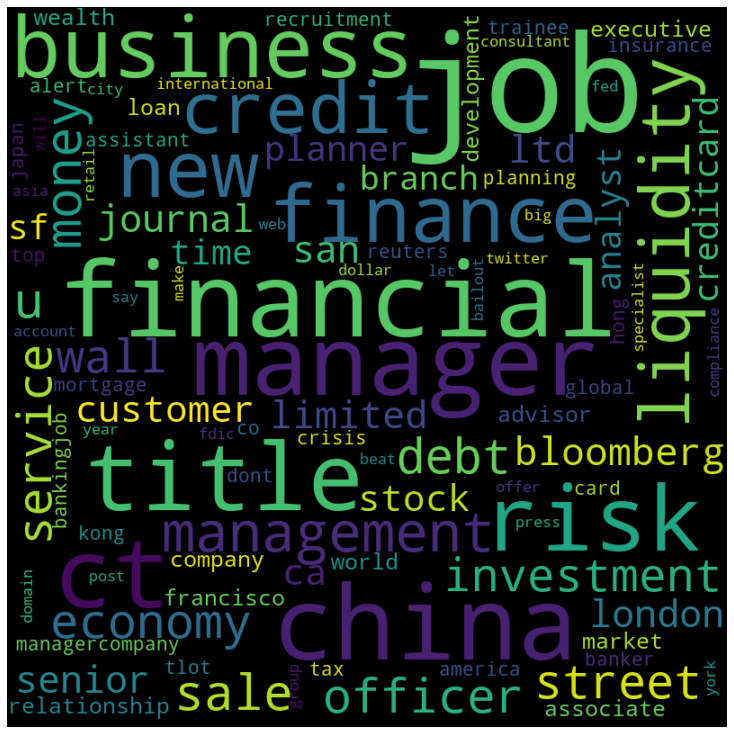

2010


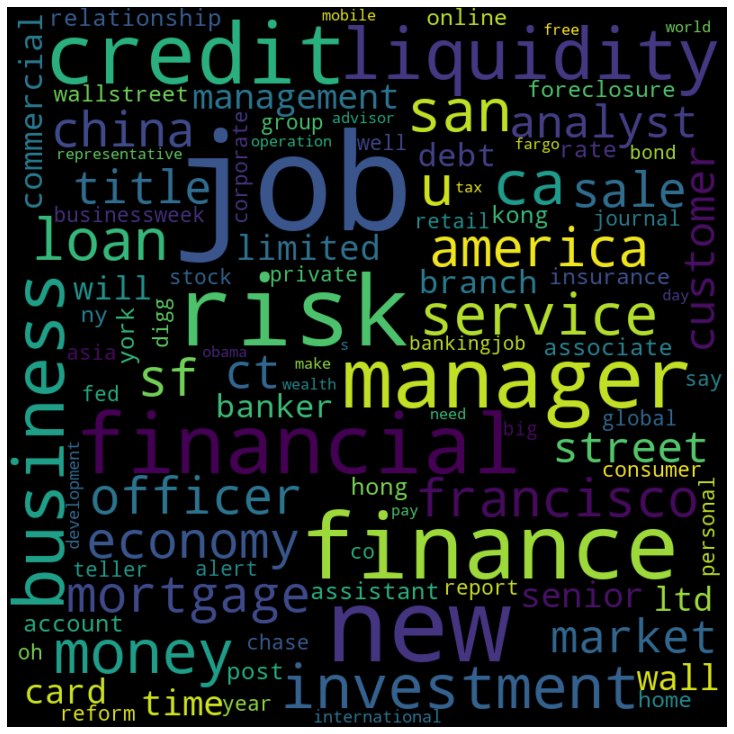

2011


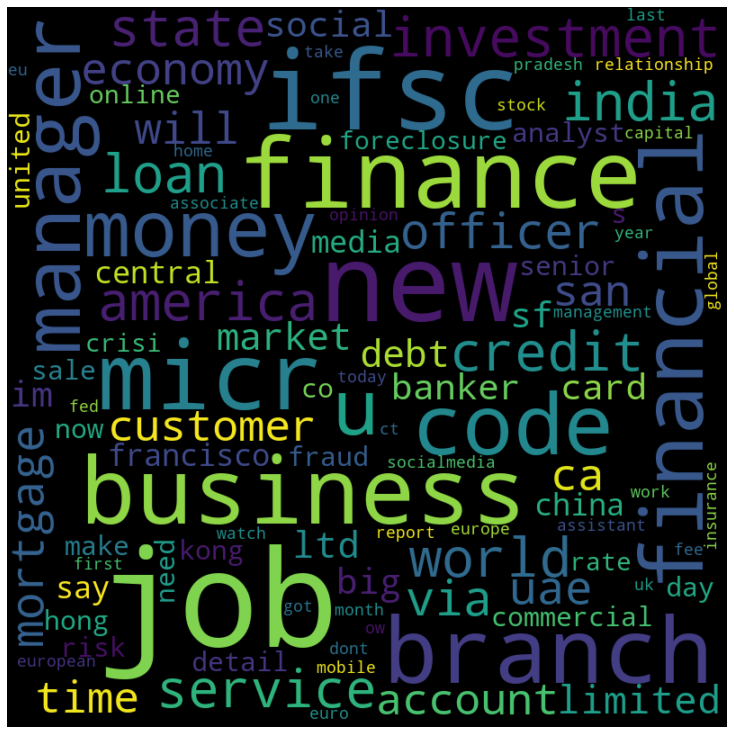

2012


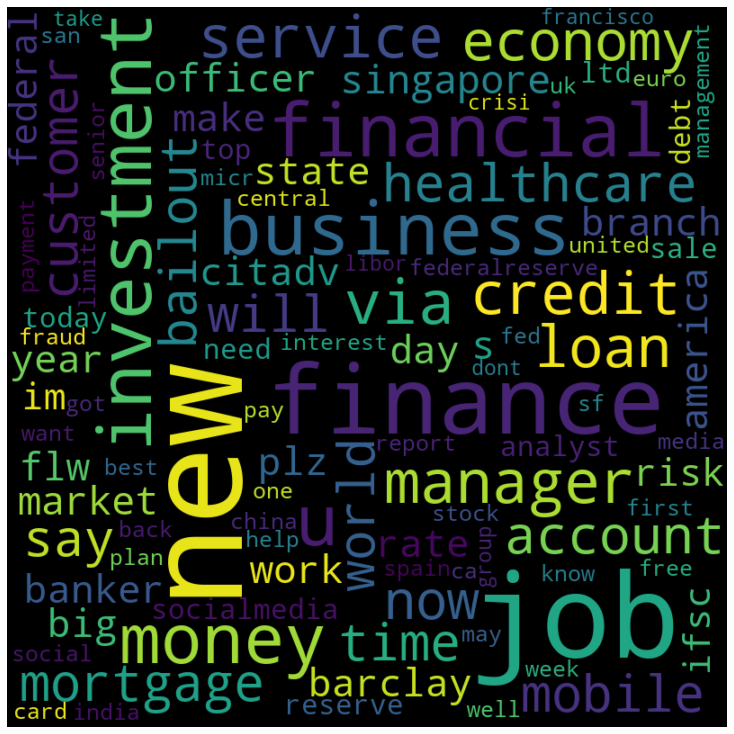

2013


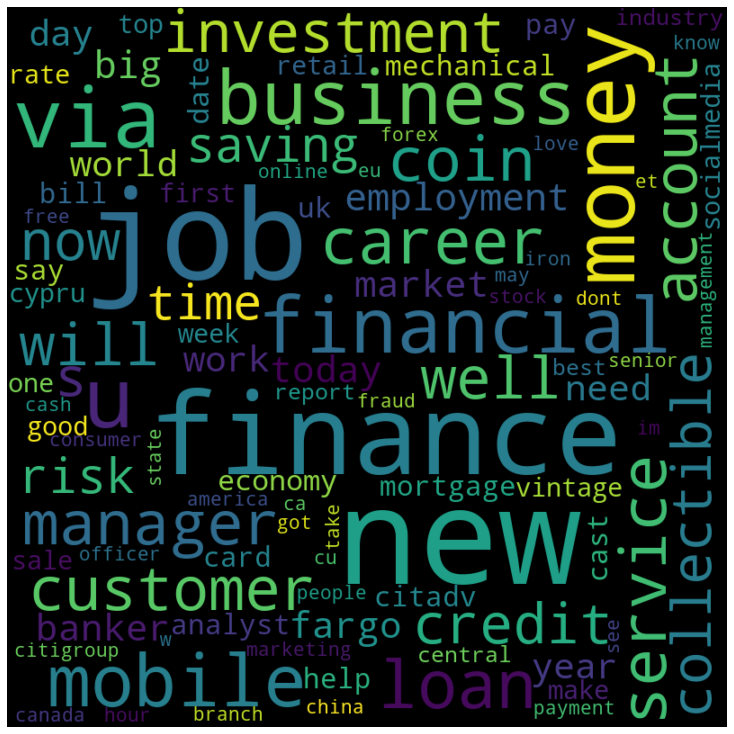

2014


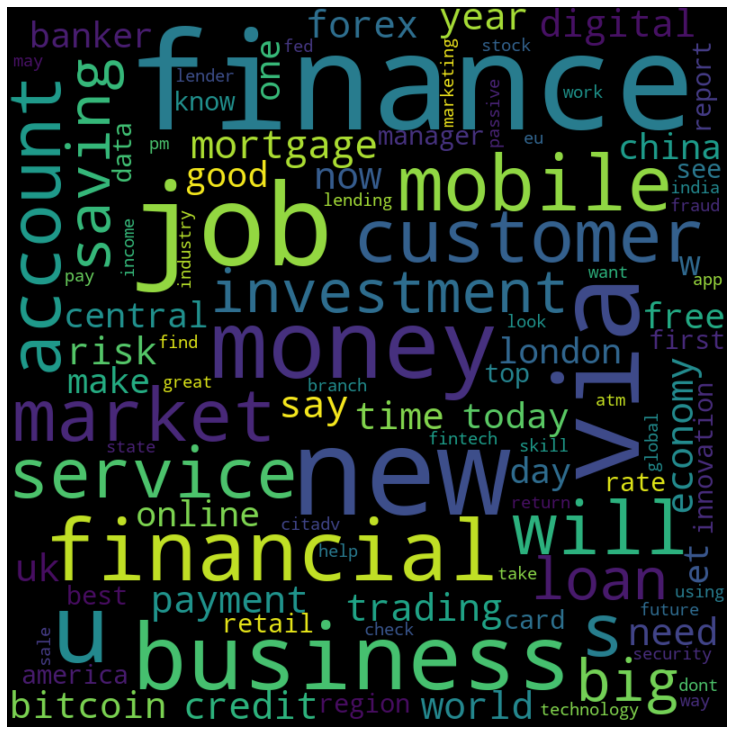

2015


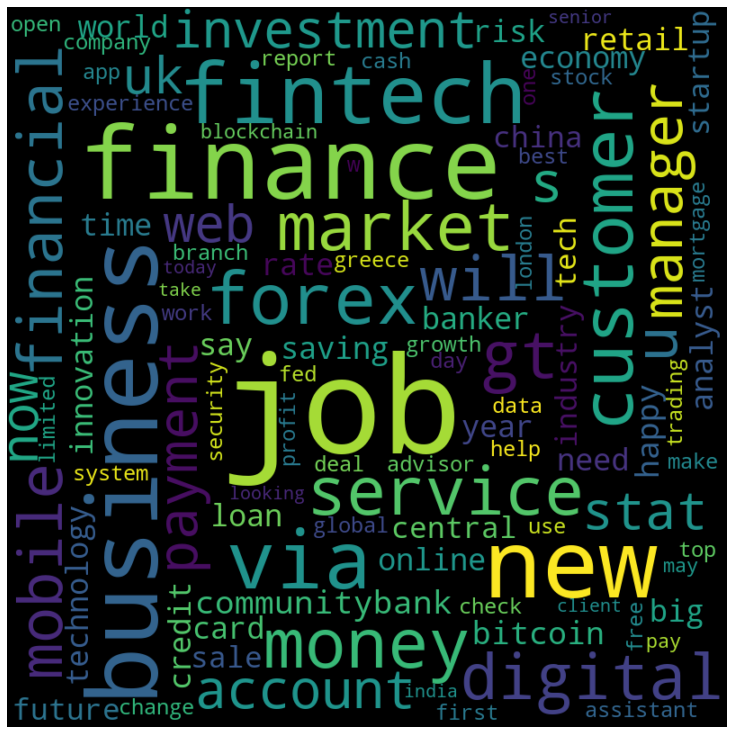

2016


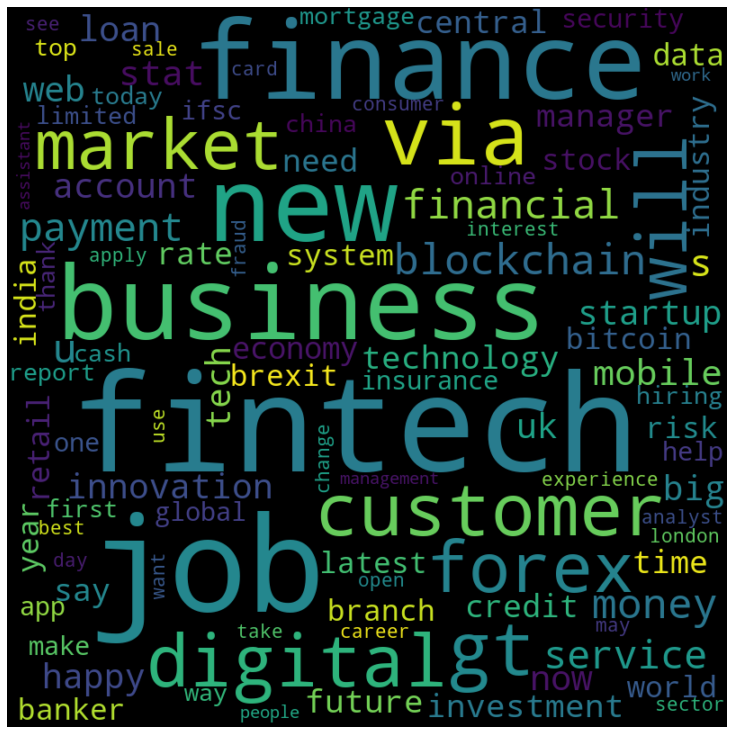

2017


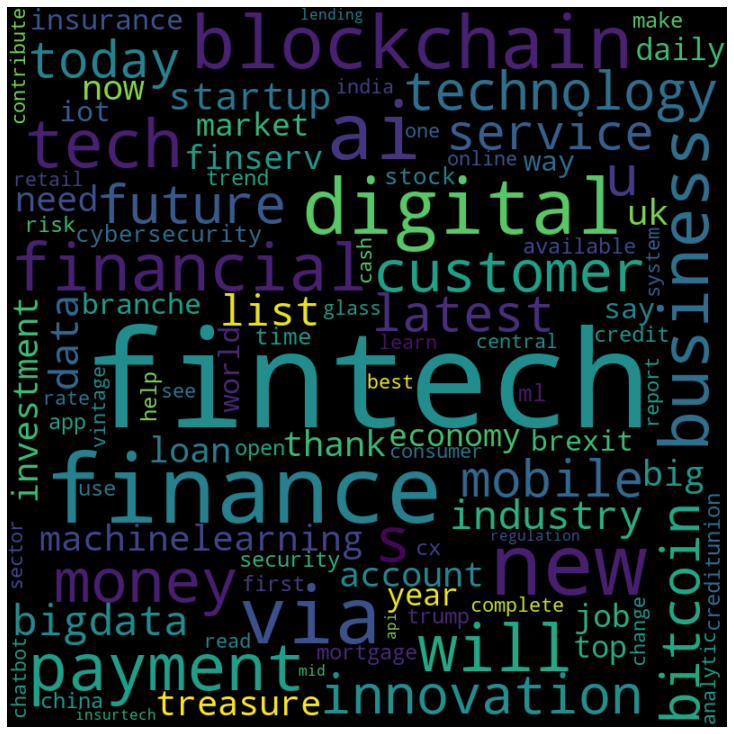

2018


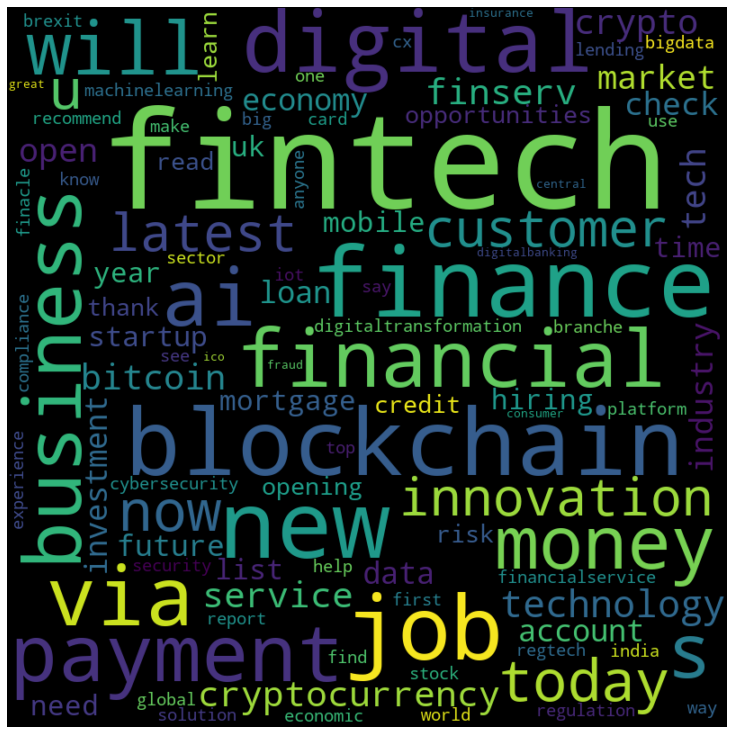

2019


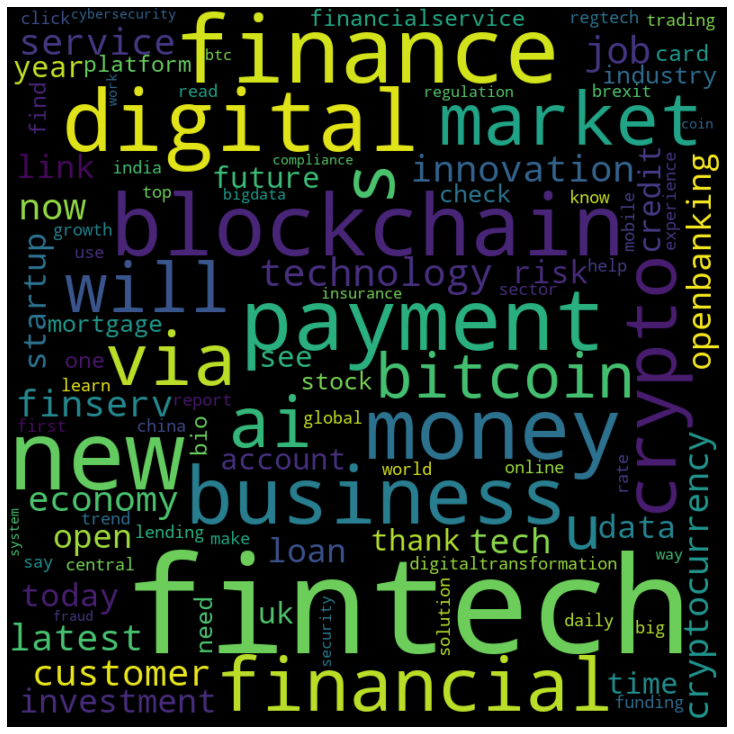

2020


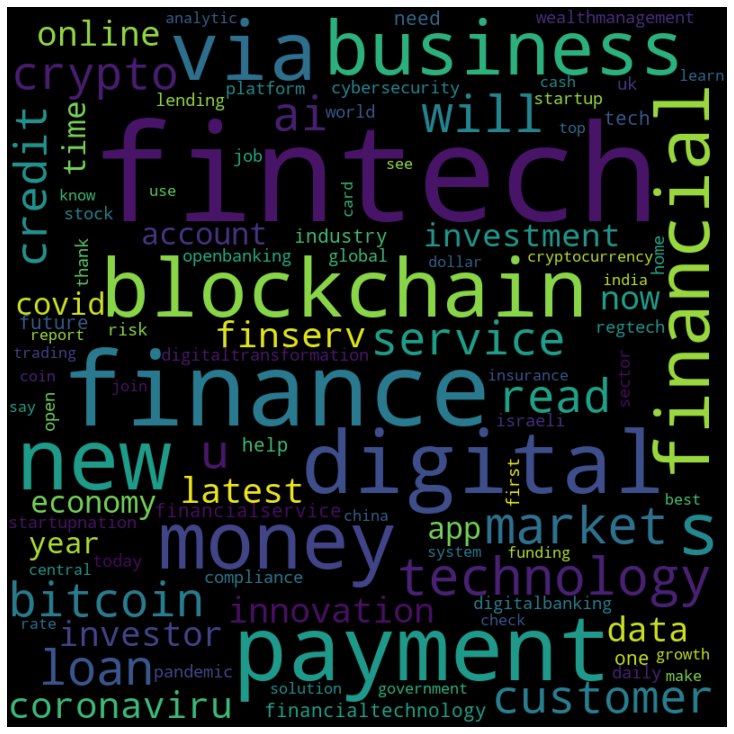

2021


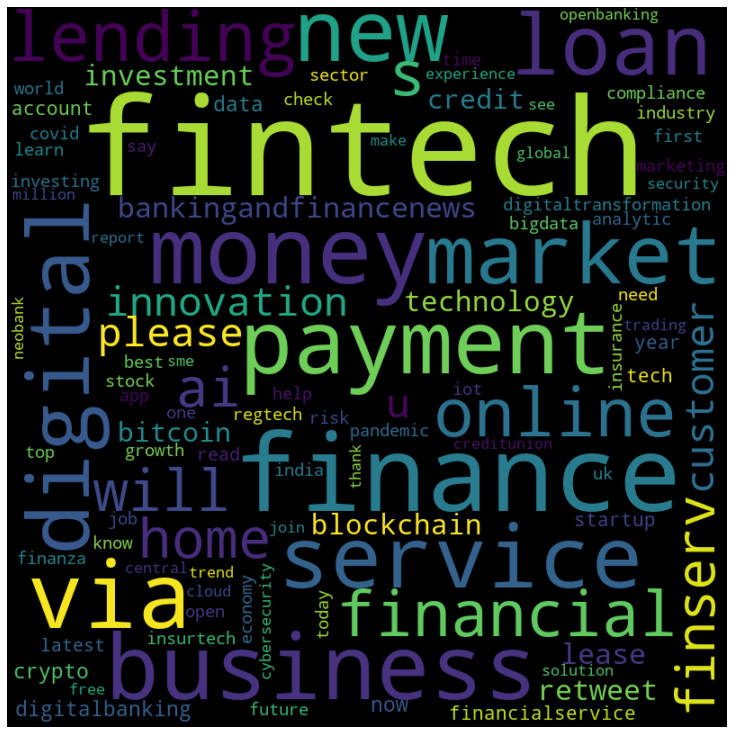

In [10]:
for index, date in enumerate(df_corpus.columns):
    print((str(date)[:4]))
    # Create a string containing all the words in a year
    allwords = ' '.join( [word for word in df_corpus[date]] )
    # Generate a wordcloud
    cloud = wc.generate(allwords)
    
    # Create subplots
    plt.figure( figsize=(20,10) )
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(path+dataset+(str(date)[:4])+'_wordcloud.pdf')
    plt.show()